DEEP LEARNING ASSIGNMENT-02

BM23MTECH11006

PITHANI TEJA VENKATA RAMANA KUMAR

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1. Convolution function: It accepts an image input, a filter kernel, stride, padding, and the non linear function. The function must convolve the input image (after padding if specified) with the
kernel (at the specified stride size) and generate an output activation after applying the specified
non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid,
tanh, ReLU, Leaky ReLU. Display the input image (e.g. a small image of the IITH logo), the filter
kernel, and the output activation map. Ensure that your function can accept multi-channel input
and a corresponding kernel volume. (5)


In [ ]:
def conv2(image, kernel, stride=1, padding=0,activation=None):
    """
    Perform 2D convolution with 3D images.

    Parameters:
        image (numpy.ndarray): Input image with shape (height, width, depth).
        kernel (numpy.ndarray): Convolution kernel with shape (kernel_height, kernel_width, depth).
        stride (int): Stride value for the convolution operation.
        padding (int): Padding value for the input image.
        activation (function): Non-linear activation function to apply.

    Returns:
        numpy.ndarray: Output activation map after convolution.
    """
    # Get dimensions
    image_height, image_width, image_depth = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    output_height = (image_height - kernel_height + 2 * padding) // stride + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride + 1

    # Pad the image
    if padding > 0:
        padded_image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
    else:
        padded_image = image

    # Initialize output
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for h in range(output_height):
        for w in range(output_width):
            h_start = h * stride
            h_end = h_start + kernel_height
            w_start = w * stride
            w_end = w_start + kernel_width
            # Vectorized convolution operation
            output[h, w] = np.sum(padded_image[h_start:h_end, w_start:w_end, :] * kernel)
            plt.imshow(padded_image[h_start:h_end, w_start:w_end, :])
    # Apply activation function
    if activation is not None:
        output = activation(output)
    return output

# Example non-linear activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)


(183, 275, 3)


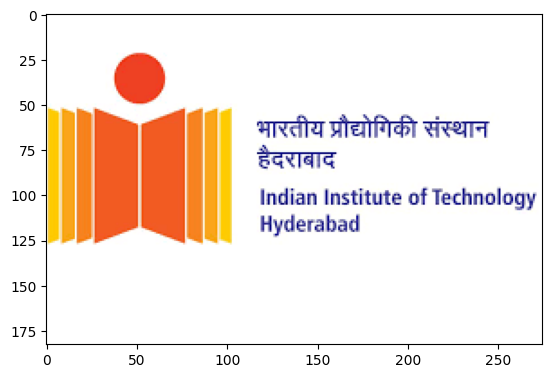

In [ ]:
# Load the PNG image
image = cv2.imread("IITH.png")

# Convert BGR to RGB (if needed)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)


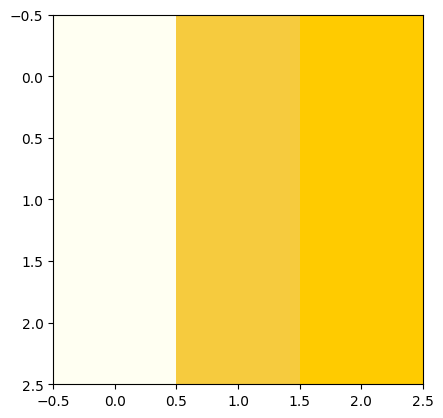

In [ ]:
plt.imshow(image[60:63, 0:3, :])


In [ ]:
# Define a random kernel with compatible depth dimension
#kernel_3d = np.random.rand(3, 3)
kernel_3d=np.array([[5,5,5],[5,5,5],[5,5,5]])
# Perform convolution
output_conv = conv2(image, kernel_3d,stride=1,padding=0,activation=relu)


# Display output shape
print("Output shape:", output_conv.shape)
#plt.imshow(output_conv)

Output shape: (181, 273)
Error in callback <function flush_figures at 0x7fe931e0c160> (for post_execute):


KeyboardInterrupt: 

2.Pooling function: It accepts as input the activation map output from the convolution function,
a pooling function, and stride. The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output. (2)

In [ ]:
def max_pooling2d(activation_map, pool_size=(2, 2), stride=2):
    """
    Perform 2D max pooling on an activation map.

    Parameters:
        activation_map (numpy.ndarray): Input activation map.
        pool_size (tuple): Size of the pooling window (height, width).
        stride (int): Stride value for pooling operation.

    Returns:
        numpy.ndarray: Pooled activation map.
    """
    # Get dimensions
    map_height, map_width = activation_map.shape

    # Calculate output dimensions
    output_height = (map_height - pool_size[0]) // stride + 1
    output_width = (map_width - pool_size[1]) // stride + 1

    # Initialize output
    pooled_output = np.zeros((output_height, output_width))

    # Perform pooling
    for h in range(output_height):
        for w in range(output_width):
            h_start = h * stride
            h_end = h_start + pool_size[0]
            w_start = w * stride
            w_end = w_start + pool_size[1]
            # Extract the region of interest (ROI)
            roi = activation_map[h_start:h_end, w_start:w_end]
            # Apply max pooling operation
            pooled_output[h, w] = np.max(roi)

    return pooled_output

(90, 136)


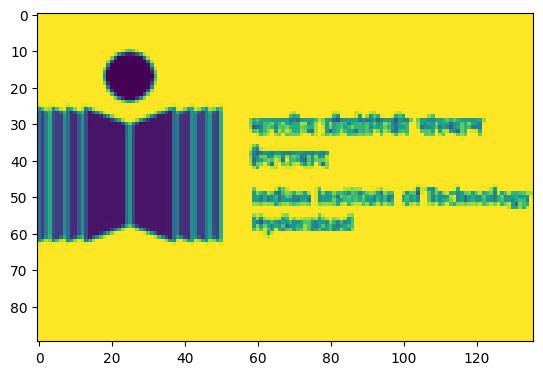

In [ ]:
# Perform max pooling
pooled_output = max_pooling2d(output_conv, pool_size=(2, 2), stride=2)
print(pooled_output.shape)
plt.imshow(pooled_output)

3. Convolution layer function: It accepts as input a volume (image or activation maps), number
of filters, kernel dimensions, stride, padding, and the non-linear activation function. The function
must convolve the input volume (after padding if specified) with each kernel (at the specified stride
size) and generate an output activation volume after applying the specified non-linearity. Display
the input image or activation maps, the filter kernels, and the output activation maps. Verify that
the output of this function does indeed have the expected size (W × H × C) as discussed in class.
(3)

In [ ]:
import numpy as np

def conv_layer(input_volume, num_filters, kernel_size, stride=1, padding=0, activation=None):
    """
    Perform convolution layer operation on an input volume.

    Parameters:
        input_volume (numpy.ndarray): Input volume (image or activation maps) with shape (height, width, depth).
        num_filters (int): Number of filters.
        kernel_size (tuple): Size of the kernel (kernel_height, kernel_width).
        stride (int): Stride value for the convolution operation.
        padding (int): Padding value for the input volume.
        activation (function): Non-linear activation function to apply.

    Returns:
        numpy.ndarray: Output activation volume after convolution and applying the activation function.
    """
    # Get dimensions
    input_height, input_width, input_depth = input_volume.shape
    kernel_height, kernel_width = kernel_size

    # Initialize filter kernels
    filters = np.random.rand(num_filters, kernel_height, kernel_width, input_depth)

    # Calculate output dimensions
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1

    # Initialize output volume
    output_volume = np.zeros((output_height, output_width, num_filters))

    # Perform convolution for each filter
    for h in range(output_height):
        for w in range(output_width):
            h_start = h * stride
            h_end = h_start + kernel_height
            w_start = w * stride
            w_end = w_start + kernel_width
            # Extract the region of interest (ROI)
            roi = input_volume[h_start:h_end, w_start:w_end, :]
            # Perform convolution operation
            for f in range(num_filters):
                # Perform element-wise multiplication and sum
                output_volume[h, w, f] = np.sum(roi * filters[f, :, :, :])

    # Apply activation function
    if activation is not None:
        output_volume = activation(output_volume)


    return output_volume

In [ ]:
# Example usage
num_filters = 5
kernel_size = (3, 3)
stride = 1
padding = 0

# Perform convolution layer with ReLU activation function
output_volume = conv_layer(image, num_filters, kernel_size, stride, padding, activation=relu)

# Display input volume and output activation volume
print("Input volume shape:", image.shape)
print("Output activation volume shape:", output_volume.shape)


Input volume shape: (183, 275, 3)
Output activation volume shape: (181, 273, 5)


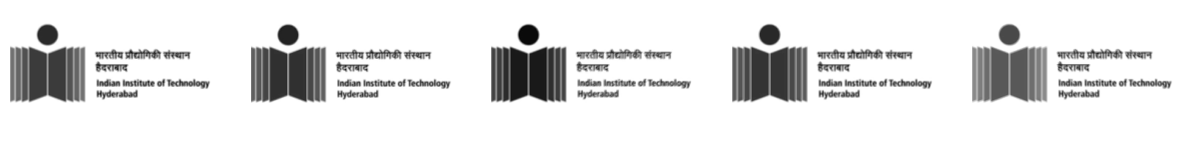

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed
for i in range(5):
    axs[i].imshow(output_volume[:, :, i], cmap='gray')  # Assuming grayscale images
    axs[i].axis('off')

plt.show()


4. Pooling layer function: It accepts as input the activation map volume, the pooling function,
stride, and generates a pooled output volume. A special case for performing Global Average Pooling
should also be provided. (2)


In [ ]:
def max_pooling2d(activation_map, pool_size=(2, 2), stride=2):
    """
    Perform 2D max pooling on an activation map.

    Parameters:
        activation_map (numpy.ndarray): Input activation map with shape (height, width, depth).
        pool_size (tuple): Size of the pooling window (height, width).
        stride (int): Stride value for pooling operation.

    Returns:
        numpy.ndarray: Pooled activation map.
    """
    # Get dimensions
    map_height, map_width, map_depth = activation_map.shape

    # Calculate output dimensions
    output_height = (map_height - pool_size[0]) // stride + 1
    output_width = (map_width - pool_size[1]) // stride + 1

    # Initialize output
    pooled_output = np.zeros((output_height, output_width, map_depth))

    # Perform pooling
    for d in range(map_depth):
        for h in range(output_height):
            for w in range(output_width):
                h_start = h * stride
                h_end = h_start + pool_size[0]
                w_start = w * stride
                w_end = w_start + pool_size[1]
                # Extract the region of interest (ROI)
                roi = activation_map[h_start:h_end, w_start:w_end, d]
                # Apply max pooling operation
                pooled_output[h, w, d] = np.max(roi)

    return pooled_output

def average_pooling2d(activation_map, pool_size=(2, 2), stride=2):
    """
    Perform 2D average pooling on an activation map.

    Parameters:
        activation_map (numpy.ndarray): Input activation map with shape (height, width, depth).
        pool_size (tuple): Size of the pooling window (height, width).
        stride (int): Stride value for pooling operation.

    Returns:
        numpy.ndarray: Pooled activation map.
    """
    # Get dimensions
    map_height, map_width, map_depth = activation_map.shape

    # Calculate output dimensions
    output_height = (map_height - pool_size[0]) // stride + 1
    output_width = (map_width - pool_size[1]) // stride + 1

    # Initialize output
    pooled_output = np.zeros((output_height, output_width, map_depth))

    # Perform pooling
    for d in range(map_depth):
        for h in range(output_height):
            for w in range(output_width):
                h_start = h * stride
                h_end = h_start + pool_size[0]
                w_start = w * stride
                w_end = w_start + pool_size[1]
                # Extract the region of interest (ROI)
                roi = activation_map[h_start:h_end, w_start:w_end, d]
                # Apply average pooling operation
                pooled_output[h, w, d] = np.mean(roi)

    return pooled_output

def global_average_pooling2d(activation_map):
    """
    Perform global average pooling on an activation map.

    Parameters:
        activation_map (numpy.ndarray): Input activation map with shape (height, width, depth).

    Returns:
        numpy.ndarray: Pooled activation map.
    """
    # Perform global average pooling
    pooled_output = np.mean(activation_map, axis=(0, 1))

    return pooled_output



In [ ]:
# Perform max pooling
pooled_output_max = max_pooling2d(output_volume, pool_size=(2, 2), stride=2)

# Perform average pooling
pooled_output_avg = average_pooling2d(output_volume, pool_size=(2, 2), stride=2)

# Perform global average pooling
pooled_output_global_avg = global_average_pooling2d(output_volume)

# Display input volume and pooled output volumes
print("Input volume shape:", output_volume.shape)
print("Max pooled output volume shape:", pooled_output_max.shape)
print("Average pooled output volume shape:", pooled_output_avg.shape)
print("Global average pooled output shape:", pooled_output_global_avg.shape)


Input volume shape: (181, 273, 5)
Max pooled output volume shape: (90, 136, 5)
Average pooled output volume shape: (90, 136, 5)
Global average pooled output shape: (5,)


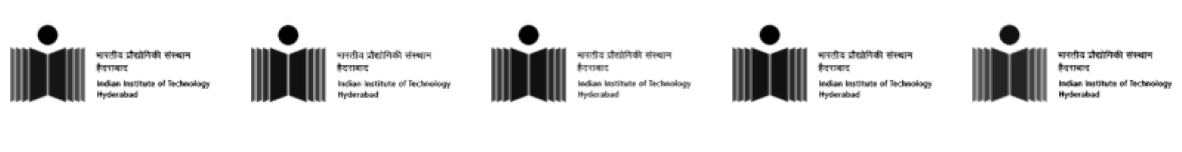

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 6))  # Adjust figsize as needed
for i in range(5):
    axs[i].imshow(pooled_output_max[:, :, i], cmap='gray')  # Assuming grayscale images
    axs[i].axis('off')

plt.show()


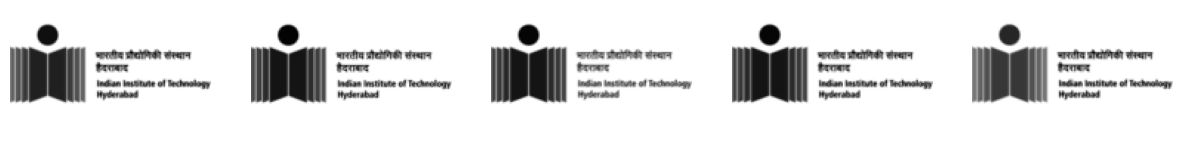

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 6))  # Adjust figsize as needed
for i in range(5):
    axs[i].imshow(pooled_output_avg[:, :, i], cmap='gray')  # Assuming grayscale images
    axs[i].axis('off')

plt.show()


5.Multilayer Perceptron (MLP) function: It accepts as input a vector, the number of hidden
layers, the size of each hidden layer, the non-linear function, and the size of the output layer. This
function should generate an output vector of the specified size. Generate the output with and
without the softmax function applied to the output layer. (3)

In [ ]:
import numpy as np

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
        x (numpy.ndarray): Input tensor.

    Returns:
        numpy.ndarray: Output tensor after applying sigmoid activation.
    """
    return 1 / (1 + np.exp(-x))

def relu(x):
    """
    Rectified Linear Unit (ReLU) activation function.

    Parameters:
        x (numpy.ndarray): Input tensor.

    Returns:
        numpy.ndarray: Output tensor after applying ReLU activation.
    """
    return np.maximum(0, x)

def softmax(x):
    """
    Softmax activation function.

    Parameters:
        x (numpy.ndarray): Input tensor.

    Returns:
        numpy.ndarray: Output tensor after applying softmax activation.
    """
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def mlp(input_vector, num_hidden_layers, hidden_layer_size, activation, output_size, apply_softmax=True):
    """
    Multilayer Perceptron (MLP) function.

    Parameters:
        input_vector (numpy.ndarray): Input vector.
        num_hidden_layers (int): Number of hidden layers.
        hidden_layer_size (int): Size of each hidden layer.
        activation (function): Non-linear activation function to apply.
        output_size (int): Size of the output layer.
        apply_softmax (bool): Whether to apply softmax to the output layer or not.

    Returns:
        numpy.ndarray: Output vector of the specified size.
    """
    # Initialize weights and biases for hidden layers
    weights_hidden = [np.random.randn(input_vector.shape[0] if i == 0 else hidden_layer_size, hidden_layer_size) for i in range(num_hidden_layers)]
    biases_hidden = [np.zeros(hidden_layer_size) for _ in range(num_hidden_layers)]

    # Initialize weights and biases for output layer
    weights_output = np.random.randn(hidden_layer_size, output_size)
    bias_output = np.zeros(output_size)

    # Forward pass through hidden layers
    for i in range(num_hidden_layers):
        if i == 0:
            hidden_output = activation(np.dot(input_vector, weights_hidden[i]) + biases_hidden[i])
        else:
            hidden_output = activation(np.dot(hidden_output, weights_hidden[i]) + biases_hidden[i])

    # Forward pass through output layer
    output = np.dot(hidden_output, weights_output) + bias_output

    # Apply softmax to output layer if specified
    if apply_softmax:
        output = softmax(output)

    return output


In [ ]:
# Example usage
input_vector = np.random.rand(10)  # Example input vector of size 10
num_hidden_layers = 2
hidden_layer_size = 20
output_size = 5

# Generate output with softmax applied
output_with_softmax = mlp(input_vector, num_hidden_layers, hidden_layer_size, relu, output_size)

# Generate output without softmax applied
output_without_softmax = mlp(input_vector, num_hidden_layers, hidden_layer_size, relu, output_size, apply_softmax=False)

# Display output shapes
print("Output shape with softmax:", output_with_softmax.shape)
print("Output shape without softmax:", output_without_softmax.shape)


Output shape with softmax: (5,)
Output shape without softmax: (5,)


6. Putting-it all together: Finally, use the functions you have written to implement a CNN with the
following architecture. The CNN must accept an image input and output a vector of appropriate
dimension. In other words, the function must effectively implement the feed-forward path in a
CNN. (5)

• Input image of size 224×224×3. Use validation images (or, random crops) from the ILSVRC
dataset.

• Convolution layer with 16 kernels of size 5 × 5 spatial dimensions and ReLU activation.

• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.

• Convolution layer with 32 kernels of spatial size 3 × 3 and sigmoid activation.

• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.

• A Global Average Pooling (GAP) layer.

• An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s
output and maps it to 1000 output nodes. Use ReLU activation for the MLP (softmax in the
o/p layer).

Verify that your composition of function accepts and image input and outputs a vector.

In [ ]:
# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting maximum for numerical stability
    return exp_x / np.sum(exp_x)

# Implement CNN architecture
def cnn(input_image):
    # Convolution layer 1
    conv1_output = conv_layer(input_image, num_filters=16, kernel_size=(5, 5), activation=relu)

    # Max pooling layer 1
    pool1_output = max_pooling2d(conv1_output, pool_size=(2, 2), stride=2)

    # Convolution layer 2
    conv2_output = conv_layer(pool1_output, num_filters=32, kernel_size=(3, 3), activation=sigmoid)

    # Max pooling layer 2
    pool2_output = max_pooling2d(conv2_output, pool_size=(2, 2), stride=2)

    # Global Average Pooling (GAP) layer
    gap_output = global_average_pooling2d(pool2_output)

    # MLP layer
    mlp_output = mlp(gap_output, num_hidden_layers=1, hidden_layer_size=gap_output.shape[0], activation=relu, output_size=1000, apply_softmax=True)

    return mlp_output

In [ ]:
# Example usage
input_image = np.random.randn(224, 224, 3)  # Example input image (224x224x3)

# Forward pass through the CNN
output_vector = cnn(input_image)

# Display output vector shape
print("Output vector shape:", output_vector.shape)


Output vector shape: (1000,)


7. The adding problem: In this task, each data sample consists of a sequence of variable length,
but a constant depth (size of feature vector at each time instance) of 2. All values of the first dimension (randomly) lie in [0, 1], and the second dimension is all zeros except for two elements that
are marked by 1. The objective of the task is to sum the random values whose second dimensions
are marked by 1. Train the different RNNs (Elmon network, LSTM, and GRU) discussed in the
class and compare their performance against a baseline that always predicts a sum of 1 plotting
the learning curves and final performance. Note that you are expected to implement these models
(as opposed to using the built-in constructs).[3 (Elmon) + 7 (LSTM) + 4 (GRU)+ 6 (Dataset &
baseline & comparison) = 20]

## Data Generation

In [ ]:
"""
Generate sequences of variable length.

For each sequence, create feature vectors with a constant depth of 2.

Randomly generate the first dimension values within the range [0, 1].

Mark two random elements in the second dimension with the value 1, while the rest remain zeros.

"""


'\nGenerate sequences of variable length.\n\nFor each sequence, create feature vectors with a constant depth of 2.\n\nRandomly generate the first dimension values within the range [0, 1].\n\nMark two random elements in the second dimension with the value 1, while the rest remain zeros.\n\n'

In [ ]:
import numpy as np

def generate_data(num_samples, max_length):
    X = []
    y = []
    max_seq_length = 0
    for _ in range(num_samples):
        length = np.random.randint(2, max_length + 1)  # Ensure minimum length of 2 for each sequence
        sequence = np.random.rand(length, 2)  # Random values between 0 and 1
        marked_indices = np.random.choice(length, size=2, replace=False)  # Choose two random indices to mark
        sequence[:, 1] = 0  # Initialize the second dimension to 0
        sequence[marked_indices, 1] = 1  # Mark the chosen indices with 1
        X.append(sequence)
        y.append(np.sum(sequence[:, 0][marked_indices]))  # Sum the marked elements
        max_seq_length = max(max_seq_length, length)

    # Pad sequences with zeros to match the length of the longest sequence
    for i in range(num_samples):
        length_diff = max_seq_length - len(X[i])
        if length_diff > 0:
            X[i] = np.pad(X[i], ((0, length_diff), (0, 0)), mode='constant')

    # Convert y labels to binary
    y_binary = np.array(y) > 0

    return X, y_binary.astype(int)


# Generate training and testing datasets
X_train, y_train = generate_data(5000, 20)
X_test, y_test = generate_data(1000, 20)


In [ ]:
# Convert data to numpy arrays
y_train = [np.array([label]) for label in y_train]
y_test = [np.array([label]) for label in y_test]


## Elmon

In [ ]:
import numpy as np

class Elman:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize Elman network parameters
        self.Wih = np.random.randn(hidden_size, input_size)
        self.Whh = np.random.randn(hidden_size, hidden_size)
        self.Who = np.random.randn(1, hidden_size)
        self.bh = np.zeros((hidden_size, 1))
        self.bo = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        T = len(x)
        self.h = np.zeros((T + 1, self.hidden_size, 1))
        self.y_hat = np.zeros((1, 1))  # Initialize output

        for t in range(T):
            xt = x[t].reshape(-1, 1)
            self.h[t + 1] = self.sigmoid(np.dot(self.Wih, xt) + np.dot(self.Whh, self.h[t]) + self.bh)

        # Calculate output based on the last hidden state
        self.y_hat = self.sigmoid(np.dot(self.Who, self.h[T]) + self.bo)

    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            loss = 0
            correct = 0  # Initialize correct predictions counter
            total = 0    # Initialize total predictions counter
            for i in range(len(X_train)):
                self.forward(X_train[i])
                loss += 0.5 * (self.y_hat - y_train[i])**2
                self.backward(X_train[i], y_train[i])
                self.update_parameters(learning_rate)

                # Calculate accuracy
                if np.round(self.y_hat) == y_train[i]:
                    correct += 1
                total += 1

            accuracy = correct / total
            print(f'Epoch {epoch + 1}, Loss: {loss}, Accuracy: {accuracy}')

    def backward(self, x, y):
        T = len(x)
        self.dWih = np.zeros_like(self.Wih)
        self.dWhh = np.zeros_like(self.Whh)
        self.dWho = np.zeros_like(self.Who)
        self.dbh = np.zeros_like(self.bh)
        self.dbo = np.zeros_like(self.bo)
        dh_next = np.zeros_like(self.h[0])

        # Backpropagation through time
        for t in reversed(range(T)):
            xt = x[t].reshape(-1, 1)
            yt = y.reshape(-1, 1)
            dy = self.y_hat - yt
            self.dWho += np.dot(dy, self.h[T].T)
            self.dbo += dy
            dh = np.dot(self.Who.T, dy) + dh_next
            dh_raw = dh * self.h[t + 1] * (1 - self.h[t + 1])
            self.dWih += np.dot(dh_raw, xt.T)
            self.dWhh += np.dot(dh_raw, self.h[t].T)
            self.dbh += dh_raw
            dh_next = np.dot(self.Whh.T, dh_raw)

    def update_parameters(self, learning_rate):
        self.Wih -= learning_rate * self.dWih
        self.Whh -= learning_rate * self.dWhh
        self.Who -= learning_rate * self.dWho
        self.bh -= learning_rate * self.dbh
        self.bo -= learning_rate * self.dbo

    def predict(self, x):
        self.forward(x)
        return self.y_hat.flatten()

    def evaluate(self, X_test, y_test):
        correct = 0
        total = 0
        for i in range(len(X_test)):
            y_pred = self.predict(X_test[i])
            correct += (y_pred >= 0.5) == y_test[i]
            total += 1
        accuracy = correct / total
        print(f'Test Accuracy: {accuracy}')


In [ ]:
# Initialize Elman network parameters
input_size = 2
hidden_size = 32
elman_model = Elman(input_size, hidden_size)

# Train the Elman network
elman_model.train(X_train, y_train, epochs=2, learning_rate=0.01)
elman_model.evaluate(X_test, y_test)


Epoch 1, Loss: [[0.09887067]], Accuracy: 1.0
Epoch 2, Loss: [[4.24979959e-06]], Accuracy: 1.0
Test Accuracy: [1.]


## LSTM

In [ ]:
import numpy as np

class LSTM:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize LSTM network parameters
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size)

        self.bf = np.zeros((hidden_size, 1))
        self.bi = np.zeros((hidden_size, 1))
        self.bc = np.zeros((hidden_size, 1))
        self.bo = np.zeros((hidden_size, 1))

        # Initialize hidden state and cell state
        self.h = np.zeros((hidden_size, 1))
        self.c = np.zeros((hidden_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x):
        T = len(x)
        self.outputs = []

        for t in range(T):
            xt = x[t].reshape(-1, 1)
            concat_input = np.vstack((self.h, xt))

            # Forget gate
            ft = self.sigmoid(np.dot(self.Wf, concat_input) + self.bf)

            # Input gate
            it = self.sigmoid(np.dot(self.Wi, concat_input) + self.bi)

            # Candidate cell state
            cct = self.tanh(np.dot(self.Wc, concat_input) + self.bc)

            # Update cell state
            self.c = ft * self.c + it * cct

            # Output gate
            ot = self.sigmoid(np.dot(self.Wo, concat_input) + self.bo)

            # Update hidden state
            self.h = ot * self.tanh(self.c)

            # Store output
            self.outputs.append(self.h)

        # Output of the last time step
        self.y_hat = self.sigmoid(np.dot(self.Wo, np.vstack((self.h, x[-1].reshape(-1, 1)))) + self.bo)

    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            loss = 0
            correct = 0
            total = 0

            for i in range(len(X_train)):
                self.forward(X_train[i])
                loss += -np.log(self.y_hat[np.arange(len(y_train[i])), np.argmax(y_train[i])]).sum()

                # Accuracy calculation
                correct += np.sum((self.y_hat >= 0.5) == y_train[i])
                total += len(y_train[i])

            accuracy = correct / total
            print(f'Epoch {epoch + 1}, Loss: {loss / total}, Accuracy: {accuracy}')

    def predict(self, x):
        self.forward(x)
        return (self.y_hat > 0.5).astype(int).flatten()

    def evaluate(self, X_test, y_test):
        correct = 0
        total = 0
        for i in range(len(X_test)):
            y_pred = self.predict(X_test[i])
            correct += np.sum(y_pred == y_test[i])
            total += len(y_test[i])
        accuracy = correct / total
        print(f'Test Accuracy: {accuracy}')

In [ ]:
# Initialize LSTM network parameters
input_size = 2
hidden_size = 128
lstm_model = LSTM(input_size, hidden_size)

# Train the LSTM network
lstm_model.train(X_train, y_train, epochs=2, learning_rate=0.01)

# Evaluate the LSTM network
lstm_model.evaluate(X_test, y_test)


Epoch 1, Loss: 1.5979422274015869, Accuracy: 63.4156
Epoch 2, Loss: 1.5865058013884128, Accuracy: 63.4064
Test Accuracy: 63.288


## GRU

In [ ]:
class GRU:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize GRU network parameters
        self.Wz = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wr = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wh = np.random.randn(hidden_size, input_size + hidden_size)

        self.bz = np.zeros((hidden_size, 1))
        self.br = np.zeros((hidden_size, 1))
        self.bh = np.zeros((hidden_size, 1))

        # Initialize hidden state
        self.h = np.zeros((hidden_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x):
        T = len(x)
        self.outputs = []

        for t in range(T):
            xt = x[t].reshape(-1, 1)
            concat_input = np.vstack((self.h, xt))

            # Update gate
            zt = self.sigmoid(np.dot(self.Wz, concat_input) + self.bz)

            # Reset gate
            rt = self.sigmoid(np.dot(self.Wr, concat_input) + self.br)

            # Candidate hidden state
            hct = self.tanh(np.dot(self.Wh, np.vstack((rt * self.h, xt))) + self.bh)

            # Update hidden state
            self.h = (1 - zt) * self.h + zt * hct

            # Store output
            self.outputs.append(self.h)

        # Output of the last time step
        self.y_hat = self.sigmoid(np.dot(self.Wz, np.vstack((self.h, x[-1].reshape(-1, 1)))) + self.bz)

    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            loss = 0
            correct = 0
            total = 0

            for i in range(len(X_train)):
                self.forward(X_train[i])
                loss += -np.log(self.y_hat[np.arange(len(y_train[i])), np.argmax(y_train[i])]).sum()

                # Accuracy calculation
                correct += np.sum((self.y_hat >= 0.5) == y_train[i])
                total += len(y_train[i])

            accuracy = correct / total
            print(f'Epoch {epoch + 1}, Loss: {loss / total}, Accuracy: {accuracy}')

    def predict(self, x):
        self.forward(x)
        return (self.y_hat > 0.5).astype(int).flatten()

    def evaluate(self, X_test, y_test):
        correct = 0
        total = 0
        for i in range(len(X_test)):
            y_pred = self.predict(X_test[i])
            correct += np.sum(y_pred == y_test[i])
            total += len(y_test[i])
        accuracy = correct / total
        print(f'Test Accuracy: {accuracy}')

In [ ]:
# Initialize GRU network parameters
input_size = 2
hidden_size = 128
gru_model = GRU(input_size, hidden_size)

# Train the GRU network
gru_model.train(X_train, y_train, epochs=2, learning_rate=0.01)

# Evaluate the GRU network
gru_model.evaluate(X_test, y_test)


Epoch 1, Loss: 5.743812870437633, Accuracy: 62.1918
Epoch 2, Loss: 5.374088661720254, Accuracy: 62.2242
Test Accuracy: 62.229


## comparison

In [ ]:
# Training and evaluating Elman model
elman_model = Elman(input_size=2, hidden_size=32)
elman_model.train(X_train, y_train, epochs=2, learning_rate=0.01)
elman_model.evaluate(X_test, y_test)

# Training and evaluating LSTM model
lstm_model = LSTM(input_size=2, hidden_size=128)
lstm_model.train(X_train, y_train, epochs=2, learning_rate=0.01)
lstm_model.evaluate(X_test, y_test)

# Training and evaluating GRU model
gru_model = GRU(input_size=2, hidden_size=128)
gru_model.train(X_train, y_train, epochs=2, learning_rate=0.01)
gru_model.evaluate(X_test, y_test)


Epoch 1, Loss: [[0.24737774]], Accuracy: 0.9998
Epoch 2, Loss: [[3.03766956e-06]], Accuracy: 1.0
Test Accuracy: [1.]
Epoch 1, Loss: 2.2497298547772937, Accuracy: 63.8104
Epoch 2, Loss: 2.253956956415284, Accuracy: 64.0288
Test Accuracy: 63.967
Epoch 1, Loss: 5.243897394938972, Accuracy: 62.8574
Epoch 2, Loss: 5.1062401074687465, Accuracy: 62.821
Test Accuracy: 62.665
